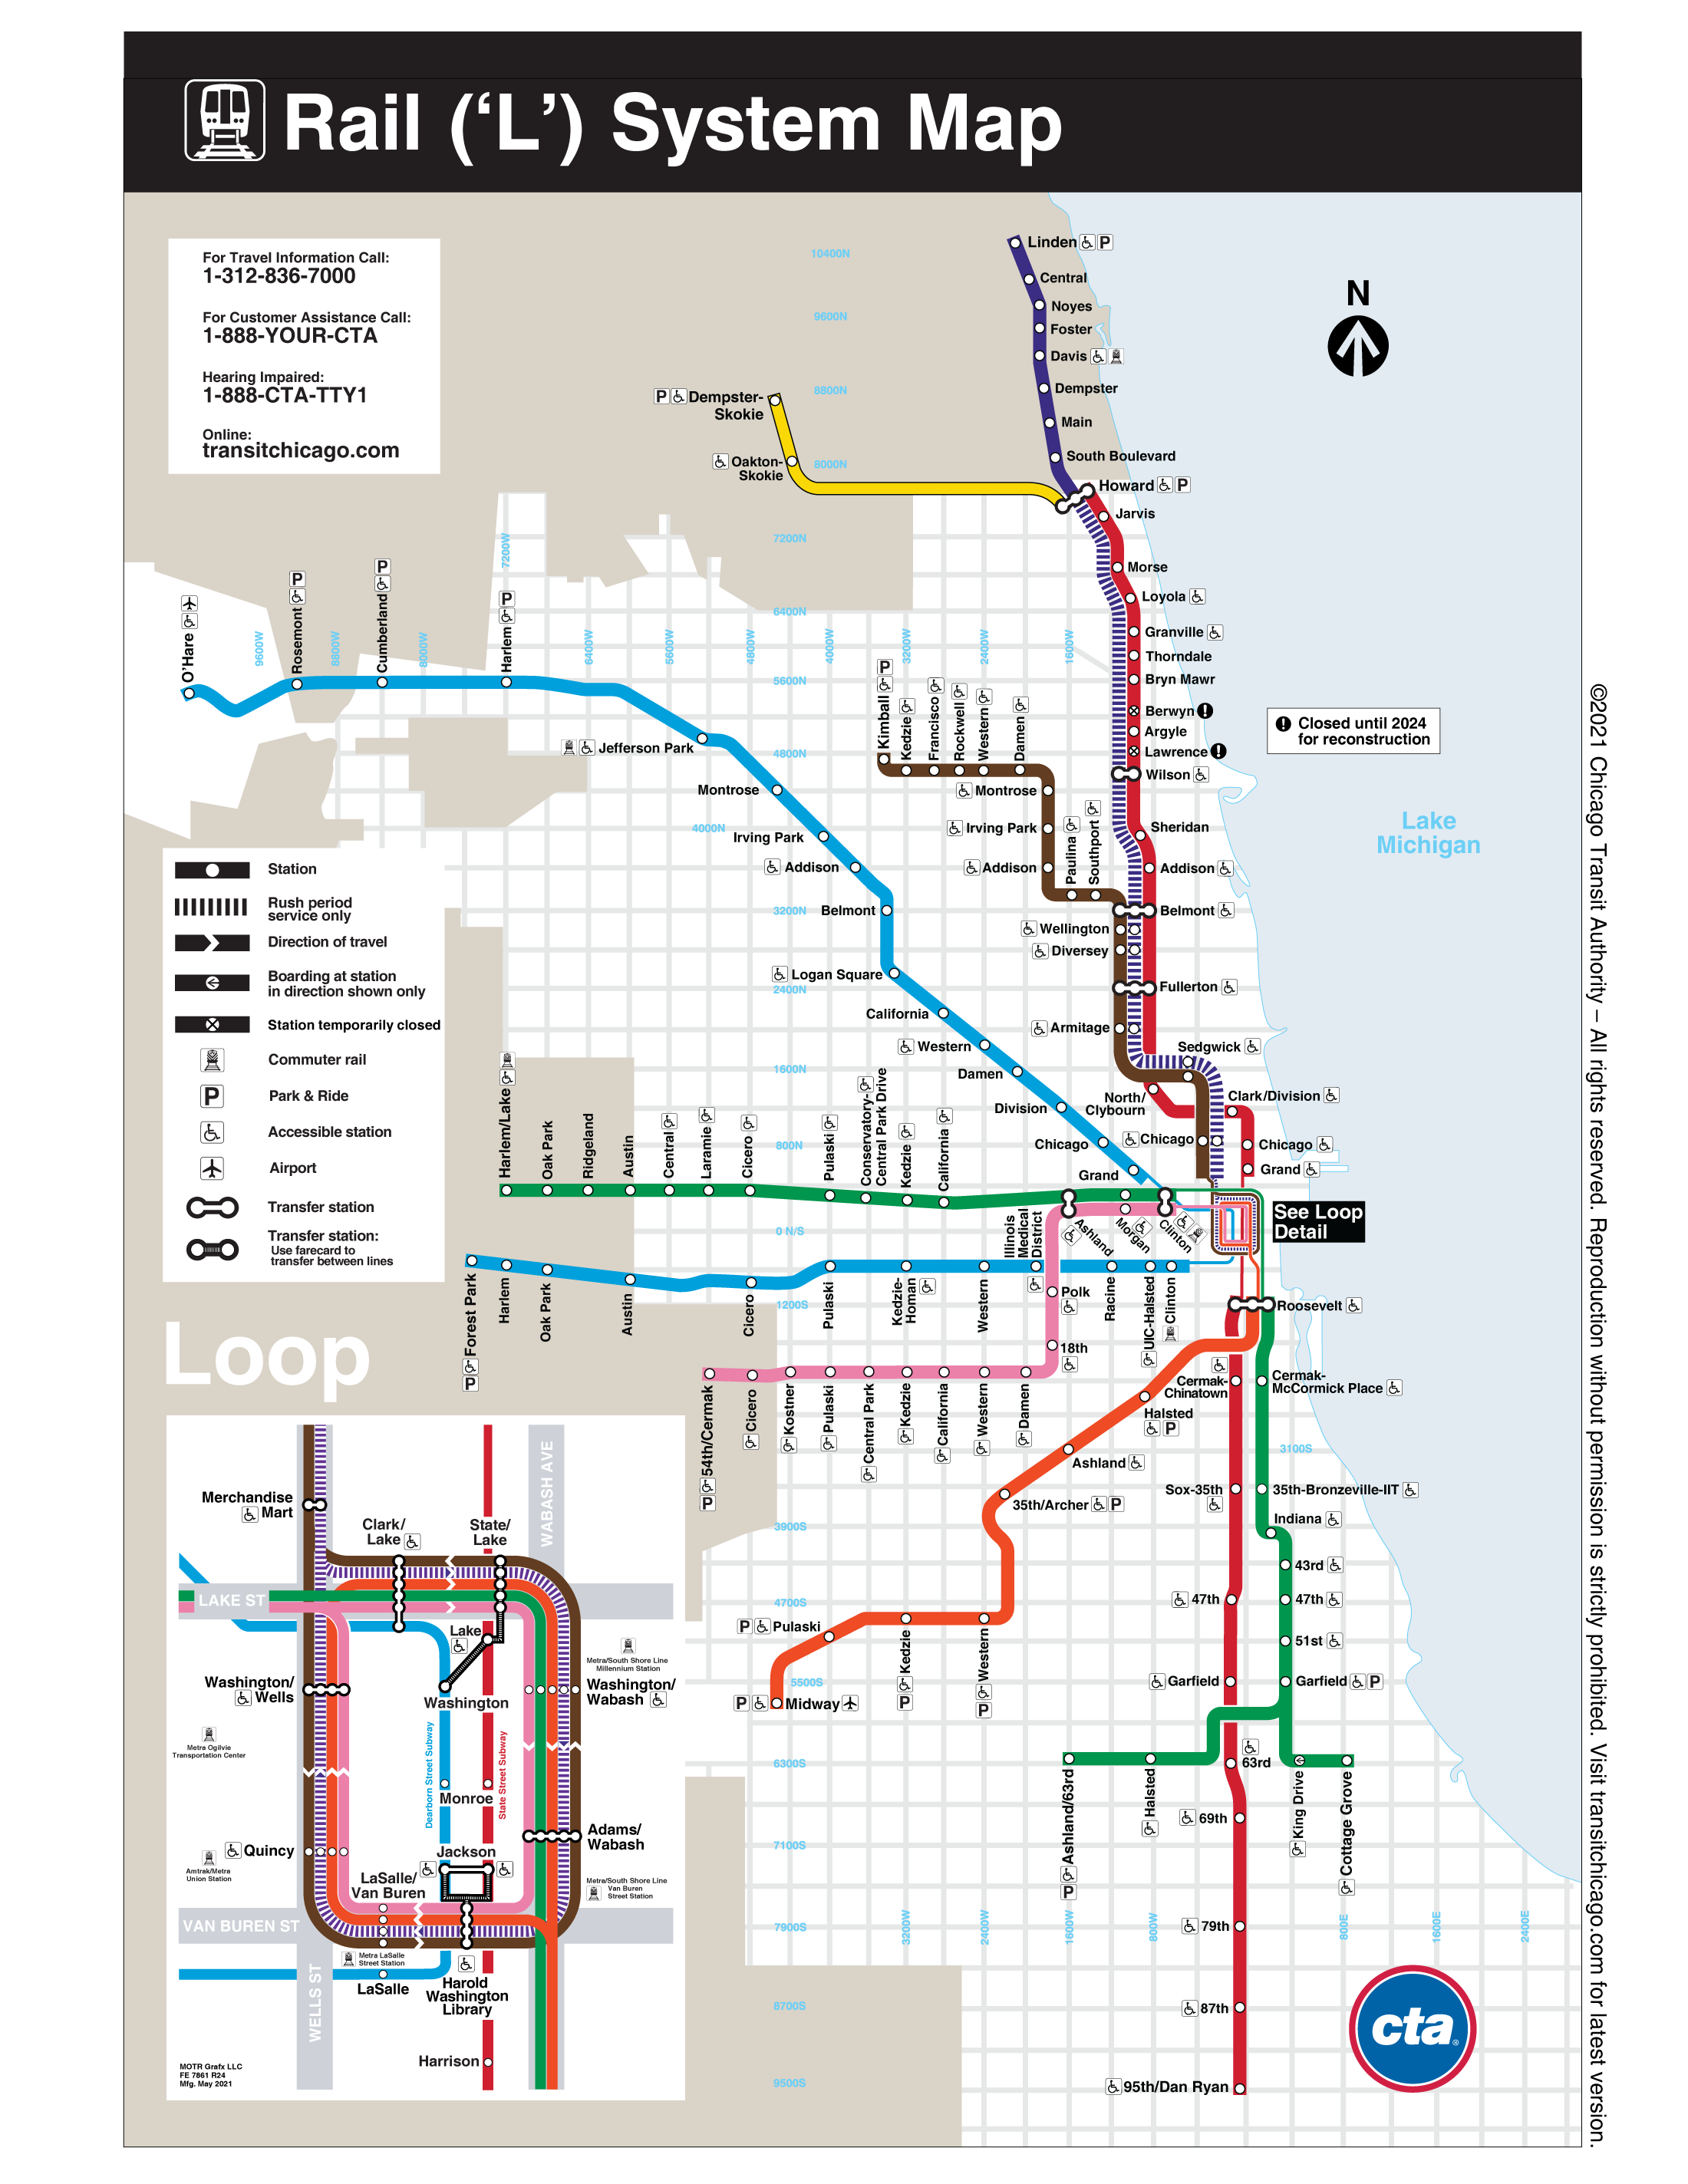

In [395]:
from IPython.core.display import Image
Image("cta_L_system_map.png", width=400, height=400)

In [396]:
import pandas as pd 
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
import matplotlib.pyplot as plt
ridership = pd.read_csv('CTA_ridership.csv')
stations = pd.read_csv('CTA_station_info.csv')
ridership.month_beginning = pd.to_datetime(ridership.month_beginning)
ridership.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189


In [397]:
stations.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [398]:
stations = stations.rename(columns = {'STATION_NAME':'stationame'})
df = ridership.merge(stations, on='stationame')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35737 entries, 0 to 35736
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_id                35737 non-null  int64         
 1   stationame                35737 non-null  object        
 2   month_beginning           35737 non-null  datetime64[ns]
 3   avg_weekday_rides         35737 non-null  float64       
 4   avg_saturday_rides        35737 non-null  float64       
 5   avg_sunday-holiday_rides  35737 non-null  float64       
 6   monthtotal                35737 non-null  int64         
 7   STOP_ID                   35737 non-null  int64         
 8   DIRECTION_ID              35737 non-null  object        
 9   STOP_NAME                 35737 non-null  object        
 10  STATION_DESCRIPTIVE_NAME  35737 non-null  object        
 11  MAP_ID                    35737 non-null  int64         
 12  ADA               

In [399]:
#Data has boolean columns for each colored line that a station belongs to. Let's get a single columns giving us the line designation 
#(many stops function on multiple lines)
def get_line(s):
    line = ''
    if s['RED']+s['BLUE']+s['G']+s['BRN']+s['P']+s['Pexp']+s['Y']+s['Pnk']+s['O'] > 1:
        line ='Multi'
    elif s['RED']:
        line = 'Red'
    elif s['BLUE']:
        line = 'Blue'
    elif s['G']:
        line = 'Green'
    elif s['BRN']:
        line = 'Brown'
    elif s['P']:
        line = 'Purple'
    elif s['Pexp']:
        line = 'Purple'
    elif s['Y']:
        line = 'Yellow'
    elif s['Pnk']:
        line = 'Pink'
    else: line = 'Orange'
    return line
df['Line'] = df.apply(get_line, axis=1)
df[df['Line']=='Red'].stationame.unique()

array(['Howard', 'Jarvis', 'Morse', 'Loyola', 'Granville', 'Thorndale',
       'Bryn Mawr', 'Berwyn', 'Argyle', 'Lawrence', 'Wilson', 'Sheridan',
       'Fullerton', 'North/Clybourn', 'Clark/Division', 'Harrison',
       'Roosevelt', 'Cermak-Chinatown', '69th', '79th', '87th',
       '95th/Dan Ryan'], dtype=object)

In [400]:
df_lines = df.groupby(['Line','month_beginning'],as_index=False).mean()
df_lines = df_lines.rename(columns={'month_beginning':'Date','avg_weekday_rides':'Average Ridership'},inplace=False)
drop = df_lines['Line'] == 'Multi'
df_lines = df_lines[~drop]
df_lines.head()

,Line,Date,station_id,Average Ridership,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,STOP_ID,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,Blue,2001-01-01,40697.777778,5348.944444,1549.100000,931.955556,128532.888889,30169.166667,40697.777778,0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Blue,2001-02-01,40697.777778,5445.422222,1572.211111,1049.388889,119393.888889,30169.166667,40697.777778,0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Blue,2001-03-01,40697.777778,5535.977778,1805.266667,1095.588889,135200.000000,30169.166667,40697.777778,0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Blue,2001-04-01,40697.777778,5479.233333,1752.233333,1146.600000,127806.111111,30169.166667,40697.777778,0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Blue,2001-05-01,40697.777778,5428.666667,1801.788889,1205.800000,132666.888889,30169.166667,40697.777778,0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/k.krieg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


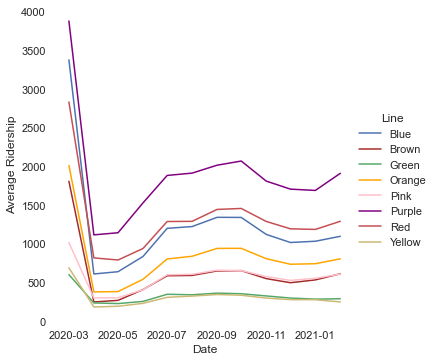

In [401]:
#View the dropoff as COVID19 arrives in the US in the 1st quarter of 2020
mask = (df_lines['Date'] >= '03/01/2020') & (df_lines['Date'] <= '02/01/2021')
df = df_lines[mask] 
df['Month'] = df['Date'].dt.month_name().str.slice(stop=3)
df_lines['Month'] = [d.month for d in df_lines['Date']]
_ = sns.relplot(data=df,
            x='Date',
            y='Average Ridership',
            kind='line',
            hue='Line', 
            palette={'Blue':'b', 'Green':'g', 'Red':'r','Purple':'purple', 'Yellow':'y','Pink':'pink','Brown':'brown','Orange':'orange'})

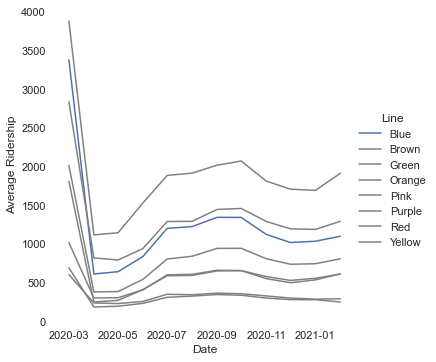

In [402]:
_ = sns.relplot(data=df,
            x='Date',
            y='Average Ridership',
            kind='line',
            hue='Line', 
            palette={'Blue':'b', 'Green':'grey', 'Red':'grey','Purple':'grey', 'Yellow':'grey','Pink':'grey','Brown':'grey','Orange':'grey'})

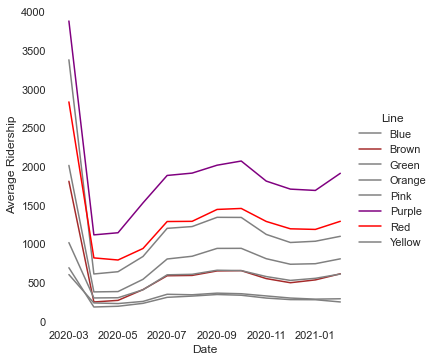

In [403]:
_ = sns.relplot(data=df,
            x='Date',
            y='Average Ridership',
            kind='line',
            hue='Line', 
            palette={'Blue':'grey', 'Green':'grey', 'Red':'red','Purple':'purple', 'Yellow':'grey','Pink':'grey','Brown':'brown','Orange':'grey'})

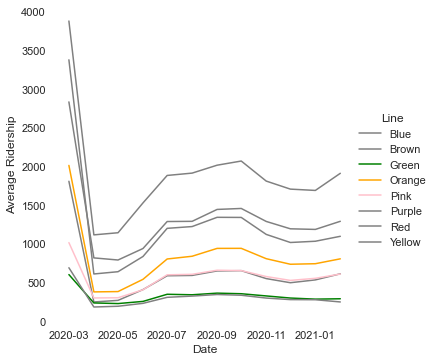

In [404]:
_ = sns.relplot(data=df,
            x='Date',
            y='Average Ridership',
            kind='line',
            hue='Line', 
            palette={'Blue':'grey', 'Green':'green', 'Red':'gray','Purple':'gray', 'Yellow':'gray','Pink':'pink','Brown':'grey','Orange':'orange'})

In [405]:
cases = pd.read_csv('CTA_covid_cases.csv')
keep = ['Date','Cases - Total','Deaths - Total','Hospitalizations - Total']
cases.head()
cases = cases[keep]
cases.Date = pd.to_datetime(cases.Date)
cases = cases[cases.Date >= '2020-02-01']
cases.set_index('Date',inplace=True)
cases.resample('MS').sum()

,Cases - Total,Deaths - Total,Hospitalizations - Total
Date,,,
2020-03-01,4413,81,1653.0
2020-04-01,21561,1031,4860.0
2020-05-01,21346,1129,3250.0
2020-06-01,6308,422,966.0
2020-07-01,8291,130,763.0
2020-08-01,10174,96,785.0
2020-09-01,9391,87,752.0
2020-10-01,27025,136,1743.0
2020-11-01,58861,482,3735.0


In [406]:
merged = pd.merge(df_lines,cases,on='Date')
merged.head()

,Line,Date,station_id,Average Ridership,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,STOP_ID,MAP_ID,ADA,...,BRN,P,Pexp,Y,Pnk,O,Month,Cases - Total,Deaths - Total,Hospitalizations - Total
0,Blue,2020-03-01,40697.777778,3377.633333,1244.511111,1092.355556,84747.777778,30169.166667,40697.777778,0.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,2.0
1,Brown,2020-03-01,40816.153846,1808.007692,662.215385,571.030769,45279.923077,30157.923077,40816.153846,0.846154,...,1.0,0.0,0.0,0.0,0.0,0.0,3,0,0,2.0
2,Green,2020-03-01,40866.666667,602.100000,322.366667,296.555556,16018.444444,30170.055556,40866.666667,0.888889,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,2.0
3,Orange,2020-03-01,40100.000000,2012.950000,1010.400000,845.900000,52555.500000,30158.000000,40100.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.5,3,0,0,2.0
4,Pink,2020-03-01,40764.000000,1015.180000,434.720000,357.360000,25859.400000,30148.700000,40764.000000,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,3,0,0,2.0


<AxesSubplot:label='ef39b625-6339-4f56-877f-bc5f90d6a716', xlabel='Date', ylabel='Cases - Total'>

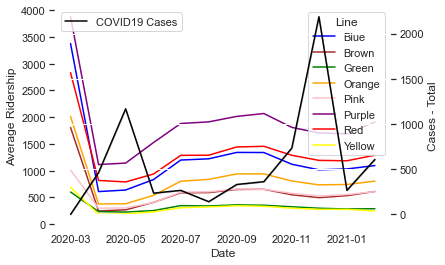

In [407]:
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'],
            x='Date',
            y='Average Ridership',
          #  kind='line',
            hue='Line', 
           palette={'Blue':'blue', 'Green':'green', 'Red':'red','Purple':'purple', 'Yellow':'yellow','Pink':'pink','Brown':'brown','Orange':'orange'}
            )
ax2 = plt.twinx()
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Cases - Total',ax=ax2,color='black',label = 'COVID19 Cases')

<AxesSubplot:label='78827a0a-c113-451b-8d8d-9d9a980a4e41', xlabel='Date', ylabel='Cases - Total'>

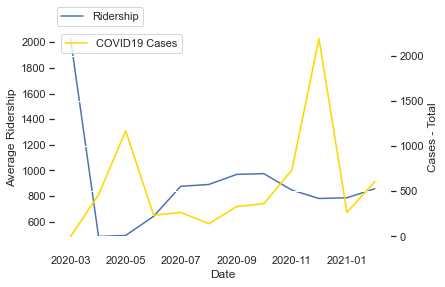

In [408]:
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'],
            x='Date',
            y='Average Ridership',
          # kind='line',
            #hue='Line', 
            label = 'Ridership',
             ci=None
           #palette={'Blue':'blue', 'Green':'green', 'Red':'red','Purple':'purple', 'Yellow':'yellow','Pink':'pink','Brown':'brown','Orange':'orange'}
            )
plt.legend(bbox_to_anchor=(0.005, 1.1), loc=2, borderaxespad=0.)
ax2 = plt.twinx()
#sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Hospitalizations - Total',ax=ax2,color='Red',label = 'COVID19 Hospitalizations')
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Cases - Total',ax=ax2,color='gold',label='COVID19 Cases')

<AxesSubplot:label='77f9e0bf-ac38-4947-90ef-62254e228d9b', xlabel='Date', ylabel='Hospitalizations - Total'>

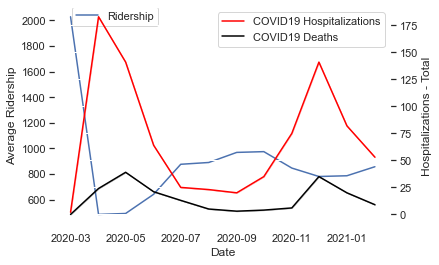

In [409]:
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'],
            x='Date',
            y='Average Ridership',
          #  kind='line',
            #hue='Line', 
             label = 'Ridership',
             ci=None
           #palette={'Blue':'blue', 'Green':'green', 'Red':'red','Purple':'purple', 'Yellow':'yellow','Pink':'pink','Brown':'brown','Orange':'orange'}
            )
plt.legend(bbox_to_anchor=(0.05, 1), loc=2, borderaxespad=0.)
ax2 = plt.twinx()
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Hospitalizations - Total',ax=ax2,color='Red',label = 'COVID19 Hospitalizations')
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Deaths - Total',ax=ax2,color='Black',label = 'COVID19 Deaths')

No handles with labels found to put in legend.


<AxesSubplot:label='7452979c-b229-4593-87b4-7b3e35db6463', xlabel='Date', ylabel='Hospitalizations - Total'>

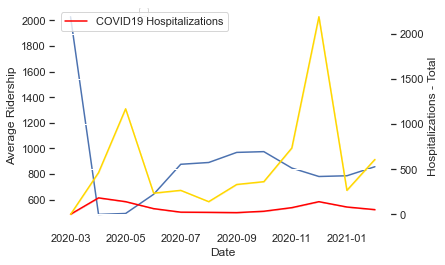

In [413]:
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'],
            x='Date',
            y='Average Ridership',
          #  kind='line',
            #hue='Line', 
            # label = 'Ridership',
             ci=None
           #palette={'Blue':'blue', 'Green':'green', 'Red':'red','Purple':'purple', 'Yellow':'yellow','Pink':'pink','Brown':'brown','Orange':'orange'}
            )
plt.legend(bbox_to_anchor=(0.25, 1), loc=2, borderaxespad=0.)
ax2 = plt.twinx()
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Hospitalizations - Total',ax=ax2,color='Red',label = 'COVID19 Hospitalizations')
sns.lineplot(data=merged[merged['Date'] >= '02/01/2020'], x='Date',y='Cases - Total',ax=ax2,color='gold')

In [412]:
change = df_lines[['Line','Date','Average Ridership']]
#change.set_index('Date',inplace=True) 
change = change.pivot(index='Date',columns='Line') 
change = change.sort_values('Date',ascending = True) 
change.reset_index()
change.columns = ['Blue', 'Brown','Green','Orange','Pink','Purple','Red', 'Yellow']
change = change.pct_change(12)*-100
change.sort_values('Date',ascending = False).head(12)

,Blue,Brown,Green,Orange,Pink,Purple,Red,Yellow
Date,,,,,,,,
2021-02-01,82.802226,82.856589,69.133901,78.492858,63.893665,70.607235,73.767143,80.039399
2021-01-01,83.246677,85.069450,68.991057,79.858945,66.350676,72.907012,75.372637,77.340587
2020-12-01,81.938098,84.221457,67.110317,78.089068,65.627895,69.966032,72.972547,75.754015
2020-11-01,83.132679,84.200446,66.590381,79.266602,67.406495,72.220347,74.899212,77.534432
2020-10-01,81.818579,82.919045,67.544252,77.619110,65.514367,70.836504,73.550265,77.076276
2020-09-01,81.842371,83.114368,67.799692,78.257754,66.518493,72.042608,74.272552,77.597371
2020-08-01,81.331526,83.800117,67.447953,78.137420,65.498655,69.942033,73.958861,78.056628
2020-07-01,81.143109,83.842838,67.310587,78.457290,65.877917,70.408083,73.871523,78.087989
2020-06-01,87.369670,89.191128,76.045251,86.446349,77.255998,76.353651,81.674511,85.329809


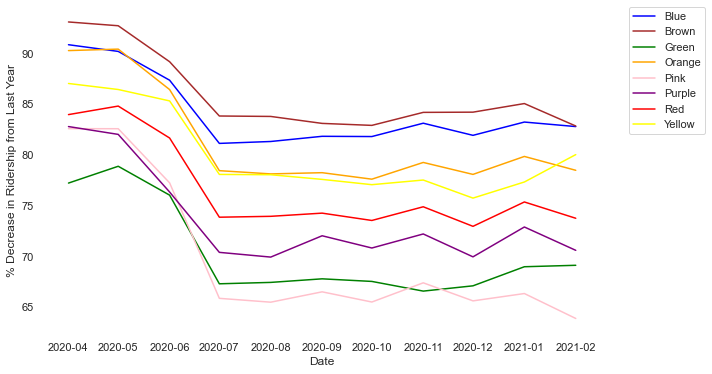

In [414]:
change['Date'] = change.index
change = change.melt('Date',var_name = 'cols', value_name = 'value')
change = change.rename(columns = {'cols':'Line','value':'% Decrease in Ridership from Last Year'})
plt.figure(figsize=(10,6))
sns.lineplot(data=change[change['Date']>='04-01-2020'],
            x= change['Date'],
        y='% Decrease in Ridership from Last Year',
        hue='Line', 
           palette={'Blue':'blue', 'Green':'Green', 'Red':'Red','Purple':'Purple', 'Yellow':'yellow','Pink':'pink','Brown':'brown','Orange':'orange'}
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

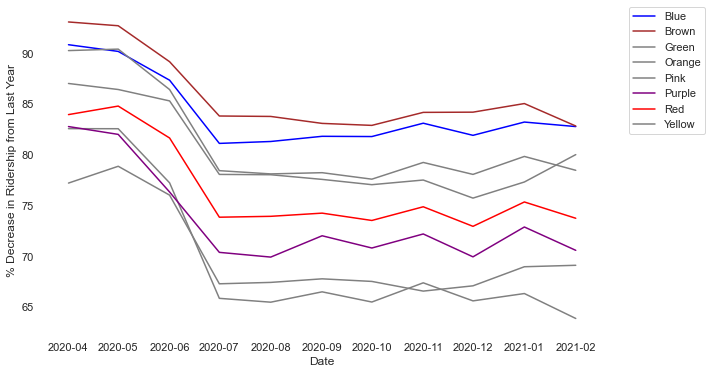

In [415]:
plt.figure(figsize=(10,6))
sns.lineplot(data=change[change['Date']>='04-01-2020'],
            x= change['Date'],
        y='% Decrease in Ridership from Last Year',
        hue='Line', 
           palette={'Blue':'blue', 'Green':'gray', 'Red':'red','Purple':'purple', 'Yellow':'gray','Pink':'gray','Brown':'brown','Orange':'gray'}
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)